In [1]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#SVM (support vector machine)
#in which we use kernal method

In [3]:
#the middle line is called hyper link

In [4]:
df = pd.read_csv('C:\\Users\\PIYUSH BHOI\\Downloads\\SVM.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
Type             20 non-null object
Flour            20 non-null int64
Milk             20 non-null int64
Sugar            20 non-null int64
Butter           20 non-null int64
Egg              20 non-null int64
Baking Powder    20 non-null int64
Vanilla          20 non-null int64
Salt             20 non-null int64
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


In [6]:
df.mean()

Flour            43.90
Milk             18.55
Sugar            17.10
Butter           11.00
Egg               7.20
Baking Powder     1.30
Vanilla           0.50
Salt              0.00
dtype: float64

In [7]:
df.shape

(20, 9)

In [8]:
df.describe()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,43.900000,18.550000,17.100000,11.000000,7.200000,1.300000,0.500000,0.0
std,7.018022,6.801509,7.538672,4.801316,3.019237,0.732695,0.512989,0.0
min,34.000000,0.000000,3.000000,5.000000,4.000000,0.000000,0.000000,0.0
25%,38.000000,15.000000,12.000000,7.000000,5.000000,1.000000,0.000000,0.0
50%,43.500000,17.000000,17.000000,10.000000,6.000000,1.000000,0.500000,0.0
75%,50.000000,24.250000,23.000000,14.250000,9.000000,2.000000,1.000000,0.0
max,55.000000,28.000000,31.000000,20.000000,14.000000,3.000000,1.000000,0.0


In [9]:
df[['Milk','Sugar']].mean()

Milk     18.55
Sugar    17.10
dtype: float64

In [10]:
#plot scatter between Flour and sugar
import seaborn

In [11]:
df.columns

Index(['Type', 'Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder',
       'Vanilla', 'Salt'],
      dtype='object')

In [12]:
Flour_values = df['Flour'].values

In [13]:
Sugar_values = df['Sugar'].values

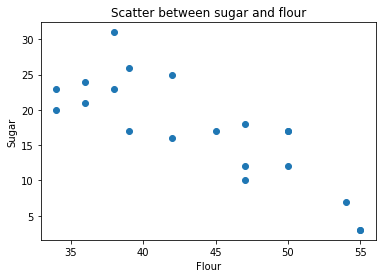

In [14]:
scatter_flour = pyplot.scatter(Flour_values,Sugar_values)
pyplot.title("Scatter between sugar and flour")
pyplot.xlabel("Flour")
pyplot.ylabel("Sugar")
pyplot.show()

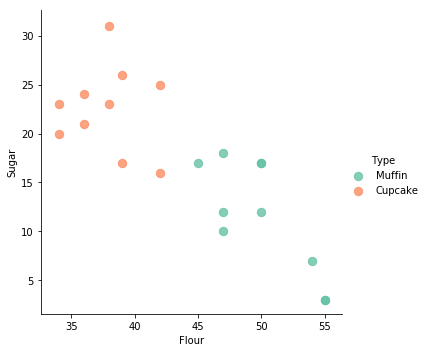

In [15]:
#plot two ingredients
seaborn.lmplot('Flour','Sugar',data=df,hue='Type',palette = 'Set2',fit_reg=False,scatter_kws={'s':70})

In [16]:
#specifiying inputs for the model
#convert muffin : 1 , and cupcake : 0
ingredients = df[["Flour","Sugar"]]
type_label = df["Type"].map({"Muffin" : 1,"Cupcake" : 0})

In [17]:
type(type_label)

pandas.core.series.Series

In [18]:
type_label.describe()

count    20.000000
mean      0.500000
std       0.512989
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000
Name: Type, dtype: float64

In [19]:
#encoding data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
d = df["Type"]
type_encode = encoder.fit_transform(d)

In [20]:
type_encode

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
#Fit the data into SVM model 
#importing svm model
from sklearn import svm
#it has two function for Regression and classification in this case we need classification so w'll call svc
model = svm.SVC(kernel='linear') #select kernels type we can check which kernel to be used by plotting first

In [22]:
model.fit(ingredients,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:

def Muffin_or_cupcake(flour,sugar):
    x = model.predict([[flour,sugar]])
    if x == 0:
        print("Muffine Recipe")
    else:
        print("Cupcake Recipe")
        

In [24]:
Muffin_or_cupcake(20,70)

Muffine Recipe


<h1>Creating new slider</h1>
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [25]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

C:\ProgramData\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [26]:
i = interact(Muffin_or_cupcake,flour=(0,100),sugar=(0,100))

interactive(children=(IntSlider(value=50, description='flour'), IntSlider(value=50, description='sugar'), Outp…